#### Reference for some other graphs or visualisations:
- https://www.darkhorseanalytics.com/portfolio-all
- https://github.com/MaayanLab/clustergrammer-widget/blob/master/README.md
- http://seaborn.pydata.org/index.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://matplotlib.org/2.0.2/api/pyplot_api.html
- DV0101EN-2-2-1-Area-Plots-Histograms-and-Bar-Charts-py-v2.0
- DV0101EN-2-3-1-Pie-Charts-Box-Plots-Scatter-Plots-and-Bubble-Plots-py-v2.0
- Data_Crime_UK_Gloucestershire_Street_Meta 032017-022020 Waffle
- DV0101EN-3-4-1-Waffle-Charts-Word-Clouds-and-Regression-Plots-py-v2.0
- exploratory-data-analysis (ALSO INCLUDES BASIC STATS)
- https://plotly.com/python/animations/

In [62]:
#Reference_ML and scikit-learn cheatsheet.ipynb
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X, y = iris.data[:, :], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train) #or, preprocessing.StandardScaler().fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #variable a.k.a yhat
accuracy_score(y_test, y_pred)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Target'] = y
df_sepal_only = df[['sepal length (cm)', 'sepal width (cm)', 'Target']]
df_petal_only = df[['petal length (cm)', 'petal width (cm)', 'Target']]

,petal length (cm),petal width (cm),Target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [1]:
##for a full list of matplotlib colours, use the below
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


#Dendrogram

In [71]:
#Reference https://www.analyticsvidhya.com/blog/2021/06/guide-to-data-visualization-with-python-part-2/
import plotly.figure_factory as ff
X = np.random.rand(20, 16)
fig = ff.create_dendrogram(X, color_threshold=1)
fig.update_layout(width=600, height=400)
fig.show()

#Simple Network diagram

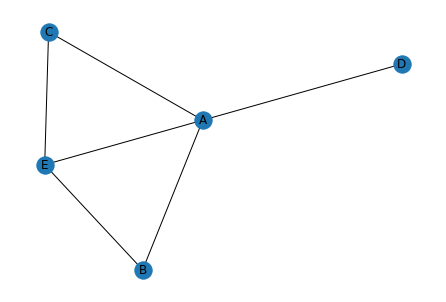

In [73]:
#Reference https://www.analyticsvidhya.com/blog/2021/06/guide-to-data-visualization-with-python-part-2/
import networkx as nx
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A' ,'A' ,'E'], 'to':['D', 'A', 'E','C','E','B']})
# Build your graph
graph=nx.from_pandas_edgelist(df, 'from', 'to')
# Plot it
nx.draw(graph, with_labels=True)

# Dash plotly visualisations

In [ ]:
#pip install dash
#pip install jupyter-dash
#pip install plotly
#pip install dash_html_components # dash html components
#pip install dash_core_components # dash core components

import dash
from dash import dcc
#import dash_core_components as dcc
from dash import html
#import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

import pandas as pd
app = dash.Dash(__name__)
# we're loading a file from a link so no need to worry about path!
df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')
# store a list of all the indicators
available_indicators = df['Indicator Name'].unique()

html.Div([ # we start with one big container
html.Div([]), # A sub-container
html.Div([]), # A second sub-container
]),

app.layout = html.Div([ # layout defines what is in our dashboard
html.Div([ # we start with one big container
html.Div([]), # A sub-container
html.Div([]), # A second sub-container
]),
dcc.Graph(id='indicator-graphic'), # Here we have one figure
dcc.Slider(),
html.Div([]),
dcc.Graph(id='indicator-graphic2'),
])

app.layout = html.Div([
html.Div([
html.Div([
dcc.Dropdown(
# Each object has an ID to identify it
id='xaxis-column',
# options is a list of things to have in the dropdown. Here we are
# using the list of indicators
options=[{'label': i, 'value': i} for i in available_indicators],
# The default value at the begining
value='Choose an indicator'
),
dcc.RadioItems(
id='xaxis-type',
options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
value='Linear',
labelStyle={'display': 'inline-block'}
)
], style={'width': '48%', 'display': 'inline-block'}),
html.Div([
dcc.Dropdown(
id='yaxis-column',
options=[{'label': i, 'value': i} for i in available_indicators],
value='Choose another indicator '
),
dcc.RadioItems(
id='yaxis-type',
options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
value='Linear',
labelStyle={'display': 'inline-block'}
)
], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
]),
dcc.Graph(id='indicator-graphic'),
dcc.Slider(
id='year--slider',
min=df['Year'].min(),
max=df['Year'].max(),
value=df['Year'].max(),
marks={str(year): str(year) for year in df['Year'].unique()},
step=None
),
html.Div([
dcc.Dropdown(id='country_indicators',
options=[{'label': i, 'value': i} for i in df['Country Name'].unique()],
value='Country Name'
)
]),
dcc.Graph(id='indicator-graphic2'),
])  
          
        
@app.callback(
Output('indicator-graphic', 'figure'), # Graph ID
Output('indicator-graphic2', 'figure'), # 2nd Graph ID
Input('xaxis-column', 'value'), #dropdown ID
Input('yaxis-column', 'value'), # 2nd dropdown ID
Input('xaxis-type', 'value'), # Radio button ID
Input('yaxis-type', 'value'), # Radio button ID
Input('year--slider', 'value'), # Slider ID
Input('country_indicators', 'value') # Last dropdwon ID
)

@app.callback(
Output('indicator-graphic', 'figure'),
Output('indicator-graphic2', 'figure'),
Input('xaxis-column', 'value'),
Input('yaxis-column', 'value'),
Input('xaxis-type', 'value'),
Input('yaxis-type', 'value'),
Input('year--slider', 'value'),
Input('country_indicators', 'value')
)
def update_graph(xaxis_column_name, yaxis_column_name,
    xaxis_type, yaxis_type,
    year_value,country_indicators):
    # filter the data according to year
    dff = df[df['Year'] == year_value]
    # select the data where 'Indicator Name' is equal to what the user has selected from the dropdown
    selected_indicator = dff[dff['Indicator Name'] == xaxis_column_name]
    # select the data where 'Indicator Name' is equal to what the user has selected from the 2nd dropdown
    second_selected_indicator = dff[dff['Indicator Name'] == yaxis_column_name]
    fig = px.scatter(x=selected_indicator['Value'],
    y=second_selected_indicator['Value'],
    hover_name=second_selected_indicator['Country Name'],color=second_selected_indicator['Value'])
    # update the layout properties to have better margin and adjust the transition speed
    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest',transition_duration=400)
    # Adding x-axis title and adjusting the scale according to the user selection
    fig.update_xaxes(title=xaxis_column_name,
    type='linear' if xaxis_type == 'Linear' else 'log')
    # Adding y-axis title and adjusting the scale according to the user selection
    fig.update_yaxes(title=yaxis_column_name,
    type='linear' if yaxis_type == 'Linear' else 'log')
    #Selecting the data where the country name is the same as what the user selected and choosing the indicator from the first dropdow
    selected_country = df[(df['Country Name'] == country_indicators ) & (df['Indicator Name'] == xaxis_column_name)]
    #plotting the Bar chart
    fig2=px.bar(selected_country,x='Year',y='Value',title=(xaxis_column_name+' in the '+country_indicators))
    return fig,fig2 # these are our outputs, which (in this case) are figures to plot
if __name__ == '__main__':
    app.run_server(debug=False)